## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [2]:
#import

import seaborn as sns
import pandas as pd

**0. Load seaborn dataset "tips"**

In [3]:
df_tips = sns.load_dataset("tips")

In [4]:
df_tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
187,30.46,2.00,Male,Yes,Sun,Dinner,5
60,20.29,3.21,Male,Yes,Sat,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
93,16.32,4.30,Female,Yes,Fri,Dinner,2
71,17.07,3.00,Female,No,Sat,Dinner,3
94,22.75,3.25,Female,No,Fri,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
154,19.77,2.00,Male,No,Sun,Dinner,4
167,31.71,4.50,Male,No,Sun,Dinner,4
216,28.15,3.00,Male,Yes,Sat,Dinner,5


In [5]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


**1. What is the prefered day for eating?**

<AxesSubplot:xlabel='day', ylabel='count'>

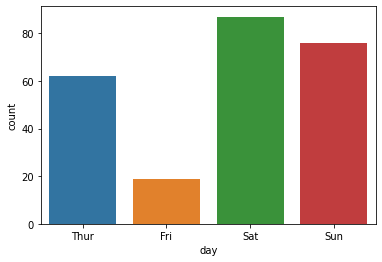

In [6]:
sns.countplot(x=df_tips["day"])

The preffered day to eat is Saturday if we think only on groups of people. But if we think of the total persons each day should be like this:

In [49]:
people_per_day = df_tips.groupby(["day"]).sum()
people_per_day

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


<AxesSubplot:xlabel='day', ylabel='people'>

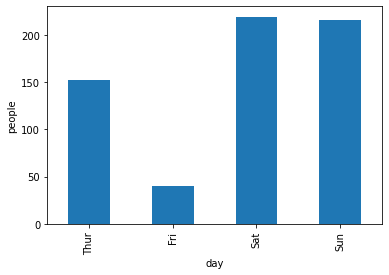

In [46]:
people_per_day["size"].plot(kind="bar", ylabel="people")

But if we calculate how many people came each day it's pretty even between Saturday (219) and Sunday (216).

**2. What days of the week has more men than women payers?**

<AxesSubplot:xlabel='day', ylabel='count'>

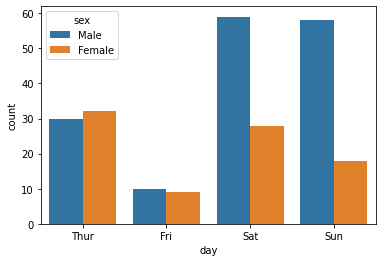

In [58]:
sns.countplot(x=df_tips["day"], hue=df_tips["sex"])

Saturday and Sundays has considerable more men than women.

**3. Do you think bill amounts change considerably depending on smoking?**

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

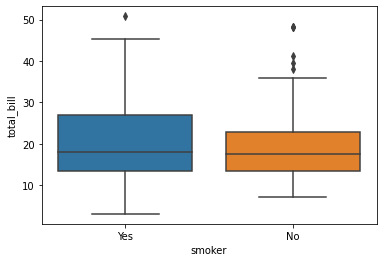

In [130]:
sns.boxplot(data=df_tips, y=df_tips["total_bill"], x=df_tips["smoker"])

In [131]:
smokers_bills = [
    df_tips[df_tips["smoker"] == "Yes"].quantile(0.25),
    df_tips[df_tips["smoker"] == "Yes"].quantile(0.50),
    df_tips[df_tips["smoker"] == "Yes"].quantile(0.75),
    df_tips[df_tips["smoker"] == "Yes"].quantile(0.98)
]

print(smokers_bills)

no_smokers_bills = [
    df_tips[df_tips["smoker"] == "No"].quantile(0.25),
    df_tips[df_tips["smoker"] == "No"].quantile(0.50),
    df_tips[df_tips["smoker"] == "No"].quantile(0.75),
    df_tips[df_tips["smoker"] == "No"].quantile(0.98)
]
print(no_smokers_bills)

[total_bill    13.42
tip            2.00
size           2.00
Name: 0.25, dtype: float64, total_bill    17.92
tip            3.00
size           2.00
Name: 0.5, dtype: float64, total_bill    26.86
tip            3.68
size           3.00
Name: 0.75, dtype: float64, total_bill    44.468
tip            6.500
size           4.160
Name: 0.98, dtype: float64]
[total_bill    13.325
tip            2.000
size           2.000
Name: 0.25, dtype: float64, total_bill    17.59
tip            2.74
size           2.00
Name: 0.5, dtype: float64, total_bill    22.755
tip            3.505
size           3.000
Name: 0.75, dtype: float64, total_bill    41.19
tip            6.70
size           6.00
Name: 0.98, dtype: float64]


Based on this information smokers has a more disperse bills than no smokers and third and forth quartile are higher than no smokers. This means that if the customer it's smoker there's a higher chance that the bill will be higher if it's outside of the first quartile.

**4. Is tip correlated to total_bill? Draw a scatter plot**

In [134]:
df_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

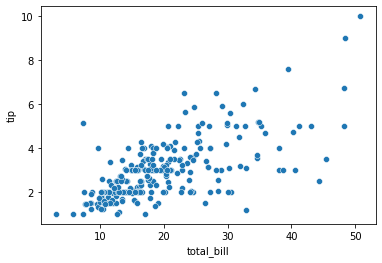

In [132]:
sns.scatterplot(x=df_tips["total_bill"],y=df_tips["tip"])

We cannot assure that there is a strong correlation between total bills and tips.

**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

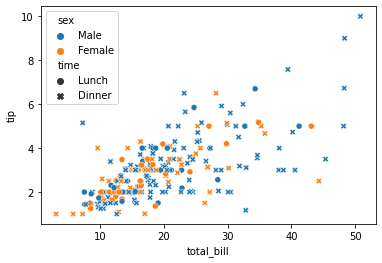

In [147]:
sns.scatterplot(data=df_tips, x="total_bill", y="tip", hue="sex", style="time")

No, i didn't find it usefull. It's has many variables making it very confusing.